In [1]:
from matplotlib import pyplot as plt
from graph import create_random_graph , to_useful, assign_states
import networkx as nx
from model import create_model
import tensorflow as tf
from mutate import mutate_dag
from crossover import crossover
from Individual import Individual
from Generation import Generation

2023-12-01 12:09:51.945000: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 12:09:51.979800: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 12:09:51.979848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 12:09:51.980977: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 12:09:51.986659: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 12:09:51.987571: I tensorflow/core/platform/cpu_feature_guard.cc:1

input


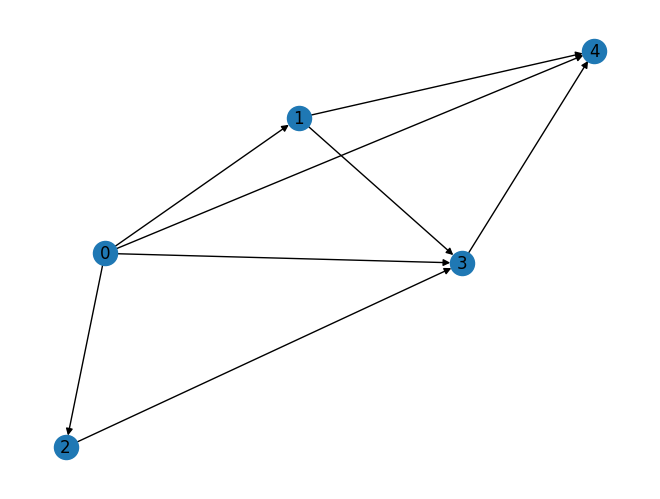

In [2]:
g1 = create_random_graph(5,0.8)
g1 = assign_states(g1,(1,3,1))
print(g1.nodes[0]['state'])
nx.draw(g1, with_labels=True)
plt.draw()

0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


OutEdgeDataView([(0, 1, {'_igraph_index': 0}), (0, 2, {'_igraph_index': 1}), (0, 3, {'_igraph_index': 2}), (0, 4, {'_igraph_index': 5}), (1, 3, {'_igraph_index': 3}), (1, 4, {'_igraph_index': 6}), (2, 3, {'_igraph_index': 4}), (3, 4, {'_igraph_index': 7})])

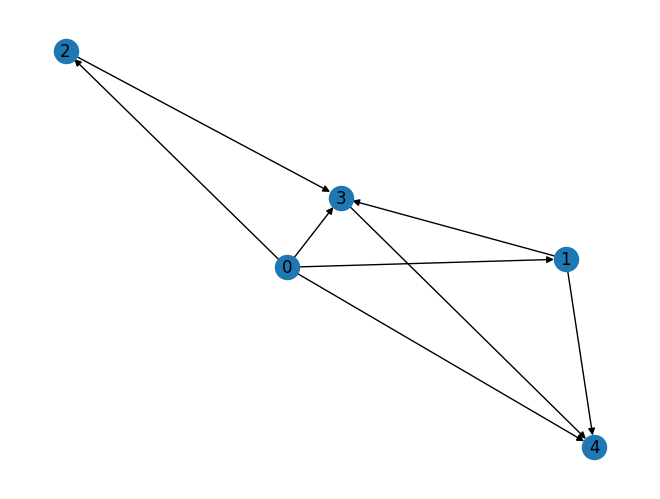

In [3]:
g1 = to_useful(g1,(1,3,1))
nx.draw(g1, with_labels=True)
plt.draw()
g1.edges(data=True)

In [4]:
g1.nodes

NodeView((0, 1, 2, 3, 4))

In [5]:
import mnist
import numpy as np
import matplotlib.pyplot as plt

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_images = (train_images / 255) 
test_images = (test_images / 255) 
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:10000]
test_labels = test_labels[:10000]
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [6]:
model = create_model(g1,(28,28,1),10)

[0, 1, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 11) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 13) dtype=float32 (created by layer '3')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]


In [7]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 1 (MaxPooling2D)            (None, 28, 28, 1)            0         ['input_layer[0][0]']         
                                                                                                  
 2 (Conv2D)                  (None, 28, 28, 11)           2167      ['input_layer[0][0]']         
                                                                                                  
 3_concatenate (Concatenate  (None, 28, 28, 13)           0         ['input_layer[0][0]',         
 )                                                                   '1[0][0]',               

In [9]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
#model.fit(train_images, train_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 12s 36ms/step - loss: 2.3484 - accuracy: 0.1246


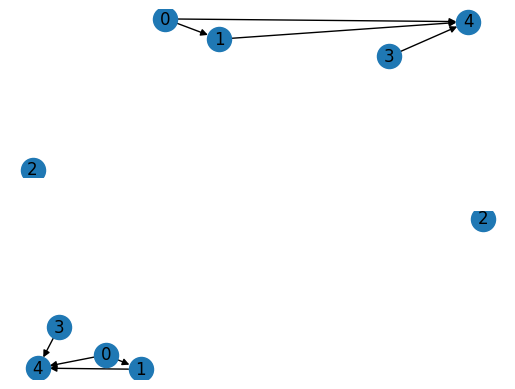

In [11]:
g1 = create_random_graph(5,0.5)
g1 = assign_states(g1,(1,3,1))
fig , ax = plt.subplots(2,1)
g3 = mutate_dag(g1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g3, with_labels=True, ax=ax[1])
plt.draw()


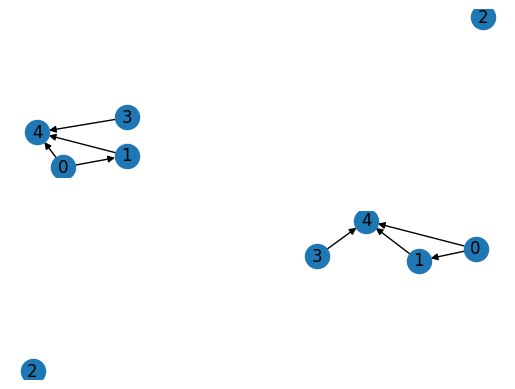

In [12]:
g4 = crossover(g1,g3)
fig , ax = plt.subplots(2,1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g4, with_labels=True, ax=ax[1])
plt.draw()

0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


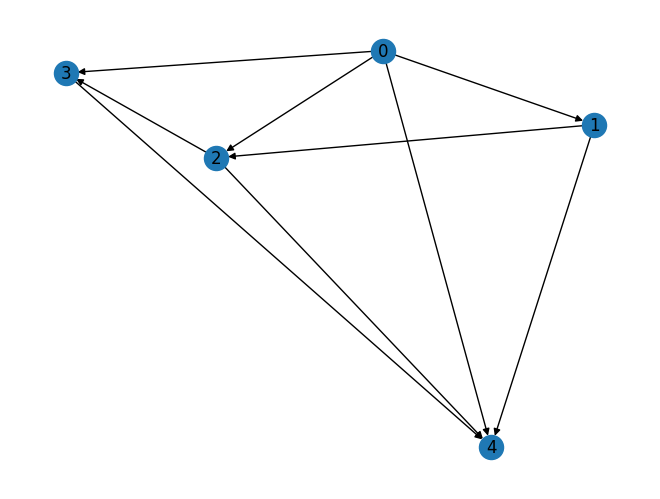

[0, 1, 2, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 5) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 9) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 11) dtype=float32 (created by layer '3')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]
Epoch 1/5
800/800 [==============================] - 4s 4ms/step - loss: 0.3835 - accuracy: 0.1134
Epoch 2/5
800/800 [==============================] - 3s 4ms/step - loss: 0.3246 - accuracy: 0.1246
Epoch 3/5
800/800 [==============================] - 3s 4ms/step - loss: 0.3241 - accuracy: 0.1437
Epoch 4/5
800/800 [==============================] - 3s 4ms/step - loss: 0.3235 - accuracy: 0.1536
Epoch 5/5
63/63 [==============================] - 0s 5ms/step


(3174.724311614945,
 0.3227759599685669,
 0.1691250056028366,
 464,
 0.5778575168641122)

In [13]:
in1 = Individual((28,28,1),(10),(1,3,1),5,0.9)
in1.score(test_images,test_labels)

0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


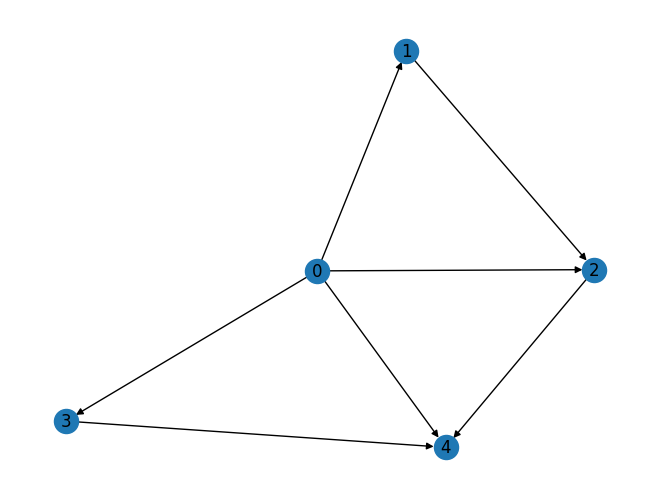

[0, 2, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '1')>, 3: <KerasTensor: shape=(None, 28, 28, 6) dtype=float32 (created by layer '3')>, 2: <KerasTensor: shape=(None, 28, 28, 2) dtype=float32 (created by layer '2')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]
0 1
False
removing j
0 2
False
removing j
0 3
True
1 4
2 4
3 4
True


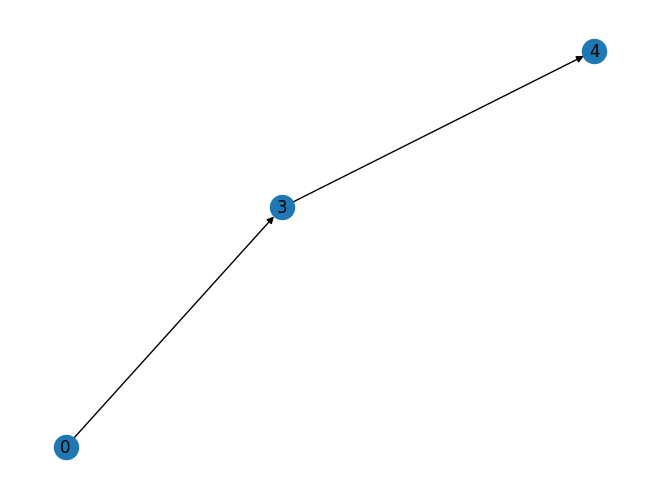

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]
0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


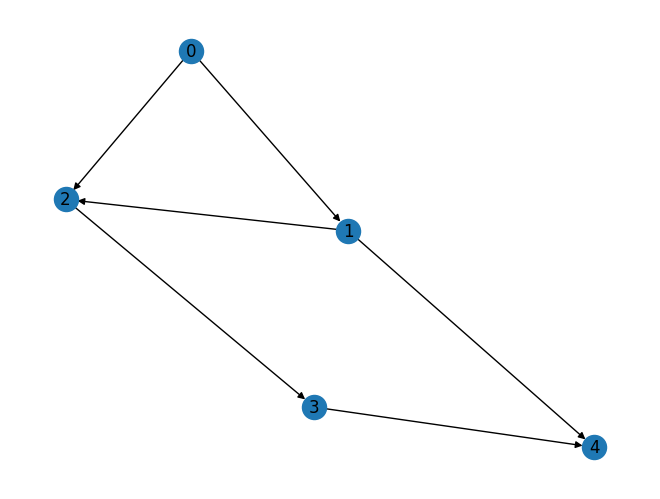

[1, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 15) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 16) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 16) dtype=float32 (created by layer '3')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]
Epoch 1/5
800/800 [==============================] - 2s 2ms/step - loss: 0.4401 - accuracy: 0.1034
Epoch 2/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3258 - accuracy: 0.1571
Epoch 3/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3249 - accuracy: 0.1619
Epoch 4/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3239 - accuracy: 0.1829
Epoch 5/5
63/63 [==============================] - 0s 3ms/step
Epoch 1/5
800/800 [==============================] - 8s 9ms/step - loss: 0.5623 - accuracy: 0.0950
Epoch 2/5
800/800 [===========

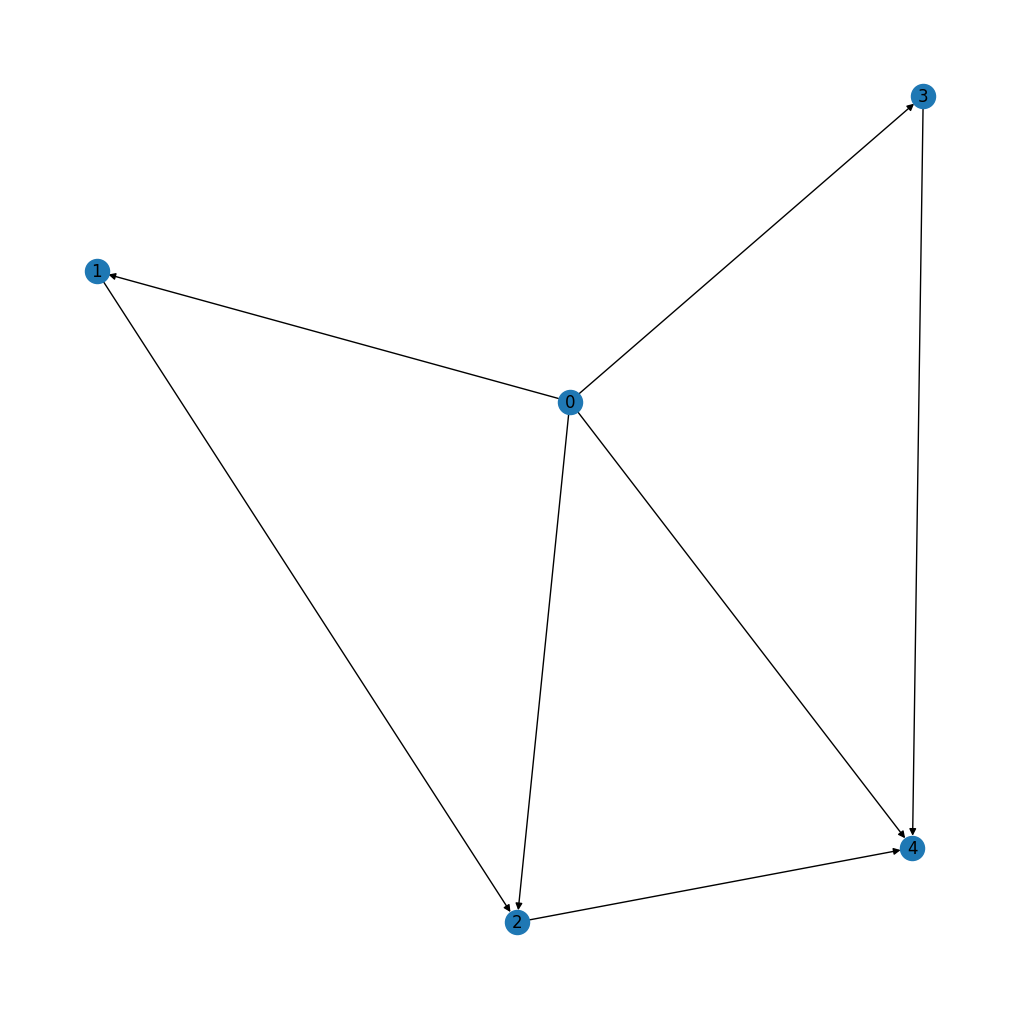

Best graph: None
Best ROC: 0.4994243405287059
---------------------------------------------------
Epoch 1/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3217 - accuracy: 0.1978
Epoch 2/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3205 - accuracy: 0.1951
Epoch 3/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3193 - accuracy: 0.1970
Epoch 4/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3181 - accuracy: 0.1966
Epoch 5/5
63/63 [==============================] - 0s 3ms/step
Epoch 1/5
800/800 [==============================] - 8s 9ms/step - loss: 0.3247 - accuracy: 0.1828
Epoch 2/5
800/800 [==============================] - 7s 9ms/step - loss: 0.3239 - accuracy: 0.1908
Epoch 3/5
800/800 [==============================] - 8s 10ms/step - loss: 0.3233 - accuracy: 0.1911
Epoch 4/5
800/800 [==============================] - 7s 9ms/step - loss: 0.3229 - accuracy: 0.1939
Epoch 5/5
63/63 [=============================

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Generation: 1
Best score: 0
Best parameters: 112
Best loss: 0.31687456369400024
Best accuracy: 0.1977500021457672
Best history: <keras.src.callbacks.History object at 0x7f983ec94190>
Best model: <keras.src.engine.functional.Functional object at 0x7f983ec49b10>


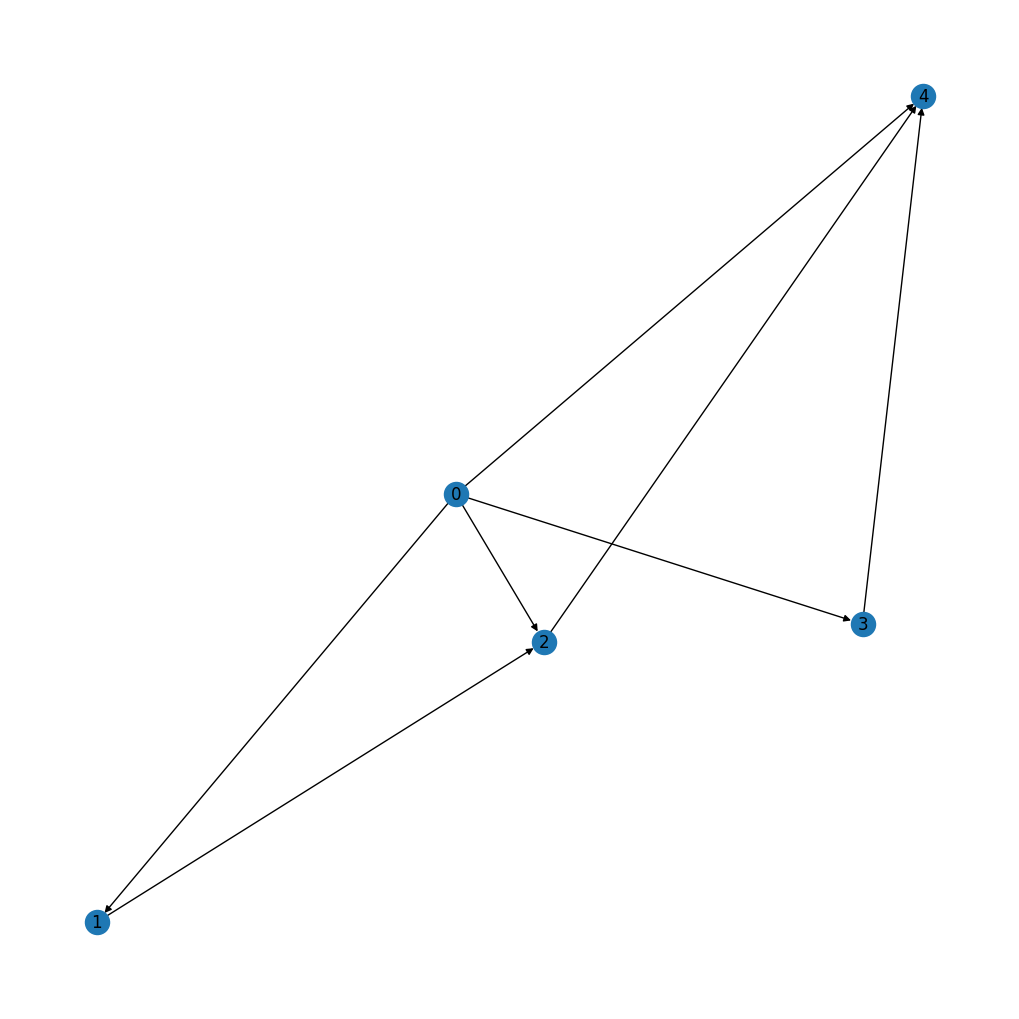

Best graph: None
Best ROC: 0.6304845152398826
---------------------------------------------------
Epoch 1/5
 53/800 [>.............................] - ETA: 1s - loss: 0.3159 - accuracy: 0.2189

: 

In [14]:
ga = Generation(input_size=(28,28,1),output_size=(10),states=(1,3,1),nodes=5,edges=0.7,population=3,limit=7,X=train_images,y=train_labels)
ga.run(10,test_images,test_labels,0.1,0.1)